SVM draws a hyperplane in n dimensional space such that it maximises margin between classification groups

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir (iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data,columns =iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Using lamba for transformation of target to flower names

In [7]:
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [8]:
df[47:53]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor


In [10]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [11]:
import matplotlib.pyplot as plt

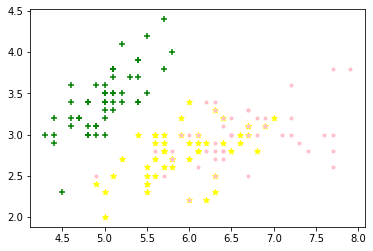

In [13]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green',marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='yellow',marker='*')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='pink',marker='.')

Clearly a boundary can be drawn between green and yellow datapoints or green and pink

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X =df.drop(['target','flower_name'],axis=1)

In [16]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
y = df.target

In [19]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [20]:
len(X_train)

120

In [21]:
len(X_test)

30

In [28]:
from sklearn.svm import SVC
model = SVC(C=3,kernel='poly')

In [29]:
model.fit(X_train, y_train)

SVC(C=3, kernel='poly')

In [30]:
model.score(X_test,y_test)

0.9666666666666667